In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
ipl = pd.read_csv("/home/my/Files/ipl.csv")
ipl.head()


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
ipl.groupby('BattingTeam')['total_run'].sum()


BattingTeam
Chennai Super Kings            2288
Delhi Capitals                 2341
Gujarat Titans                 2663
Kolkata Knight Riders          2223
Lucknow Super Giants           2548
Mumbai Indians                 2217
Punjab Kings                   2343
Rajasthan Royals               2943
Royal Challengers Bangalore    2632
Sunrisers Hyderabad            2197
Name: total_run, dtype: int64

In [7]:
ipl.groupby('batter')['batsman_run'].sum().sort_values(ascending=False).head(10)


batter
JC Buttler      863
KL Rahul        616
Q de Kock       508
HH Pandya       487
Shubman Gill    483
DA Miller       481
F du Plessis    468
S Dhawan        460
SV Samson       458
DJ Hooda        451
Name: batsman_run, dtype: int64

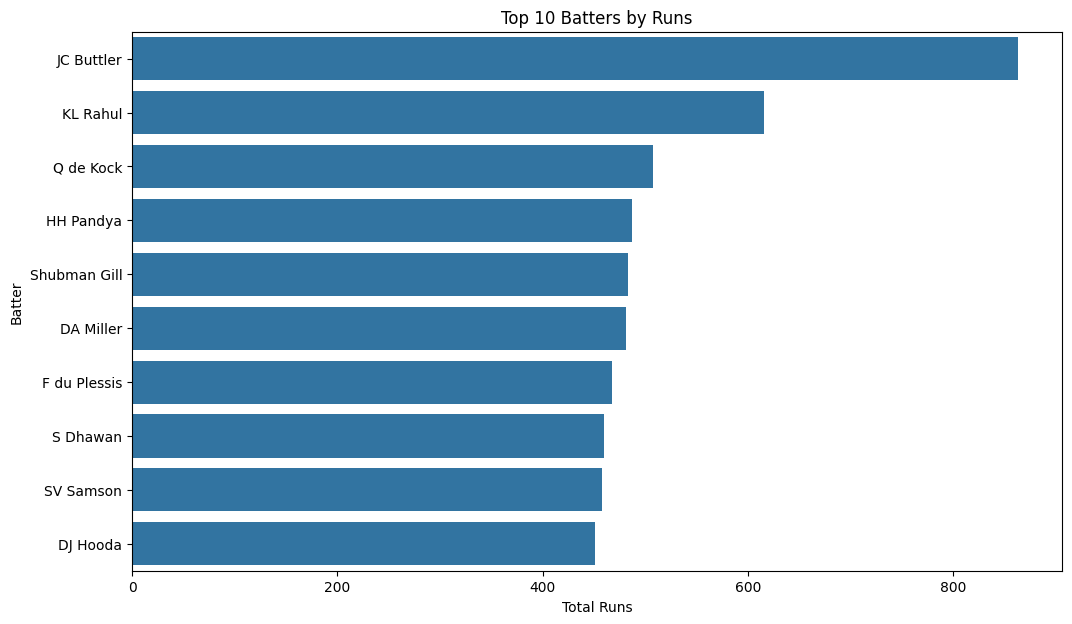

In [9]:
# top 10 better by run
top_batters = ipl.groupby('batter')['batsman_run'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_batters.values, y=top_batters.index)
plt.title('Top 10 Batters by Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.show()


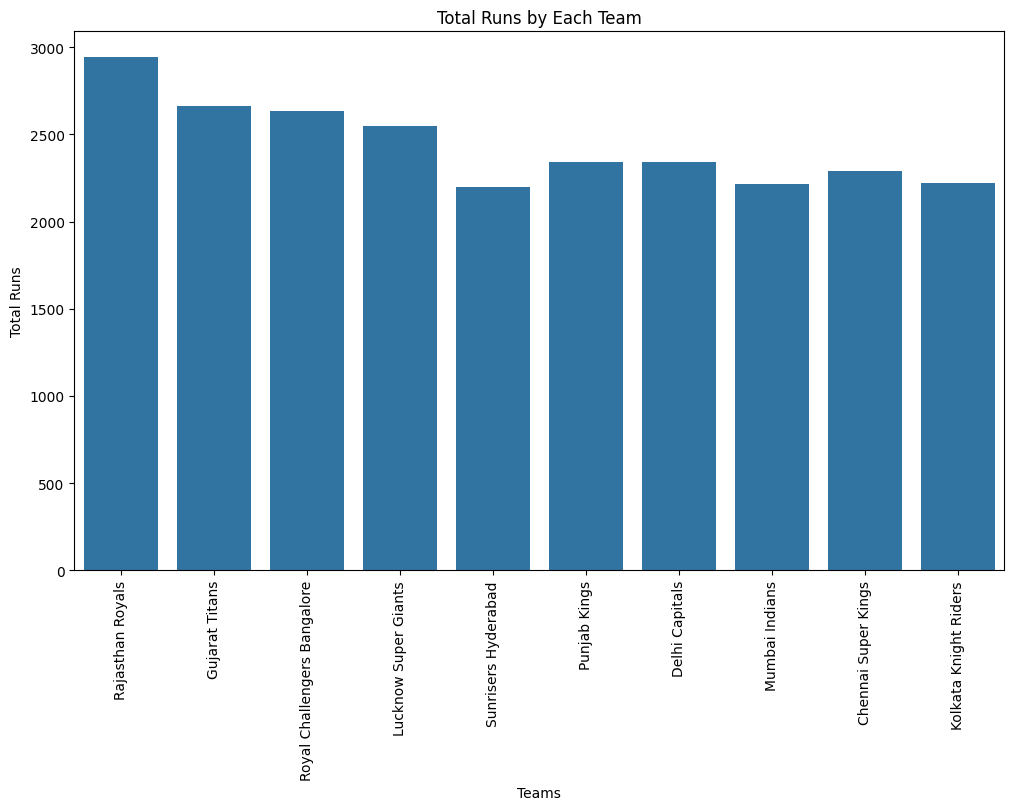

In [10]:
# team wise total run
plt.figure(figsize=(12, 7))
sns.barplot(x=ipl['BattingTeam'], y=ipl['total_run'], estimator=sum, errorbar=None)
plt.xticks(rotation=90)
plt.title('Total Runs by Each Team')
plt.xlabel('Teams')
plt.ylabel('Total Runs')
plt.show()

In [11]:
ipl.groupby('overs')['isWicketDelivery'].sum()

overs
0     35
1     35
2     38
3     29
4     45
5     38
6     29
7     38
8     39
9     36
10    34
11    34
12    45
13    43
14    64
15    57
16    47
17    72
18    61
19    93
Name: isWicketDelivery, dtype: int64

In [12]:
ipl.groupby('overs')['total_run'].sum()

overs
0      870
1     1026
2     1138
3     1271
4     1325
5     1317
6     1008
7     1203
8     1188
9     1183
10    1182
11    1177
12    1235
13    1254
14    1221
15    1283
16    1323
17    1454
18    1416
19    1321
Name: total_run, dtype: int64

In [20]:
# Basic Info
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 17912 non-null  int64 
 1   innings            17912 non-null  int64 
 2   overs              17912 non-null  int64 
 3   ballnumber         17912 non-null  int64 
 4   batter             17912 non-null  object
 5   bowler             17912 non-null  object
 6   non-striker        17912 non-null  object
 7   extra_type         1050 non-null   object
 8   batsman_run        17912 non-null  int64 
 9   extras_run         17912 non-null  int64 
 10  total_run          17912 non-null  int64 
 11  non_boundary       17912 non-null  int64 
 12  isWicketDelivery   17912 non-null  int64 
 13  player_out         912 non-null    object
 14  kind               912 non-null    object
 15  fielders_involved  704 non-null    object
 16  BattingTeam        17912 non-null  objec

In [18]:
# Check Missing Values
ipl.isnull().sum()

ID                       0
innings                  0
overs                    0
ballnumber               0
batter                   0
bowler                   0
non-striker              0
extra_type           16862
batsman_run              0
extras_run               0
total_run                0
non_boundary             0
isWicketDelivery         0
player_out           17000
kind                 17000
fielders_involved    17208
BattingTeam              0
dtype: int64

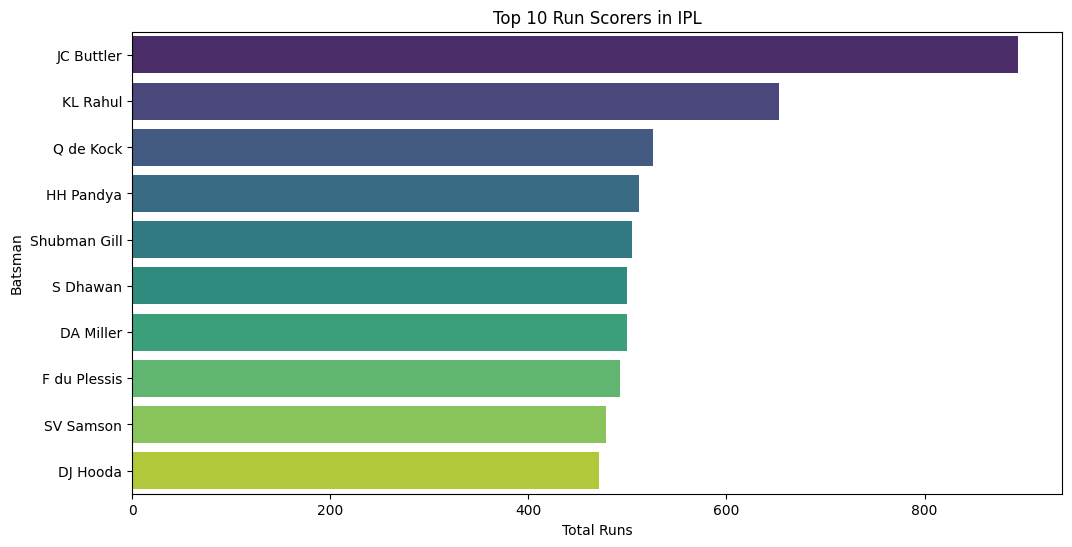

In [26]:
# Top 10 Run Scorers
top_scorers = ipl.groupby('batter')['total_run'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, hue=top_scorers.index, palette='viridis', legend=False)

plt.title("Top 10 Run Scorers in IPL")

plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()



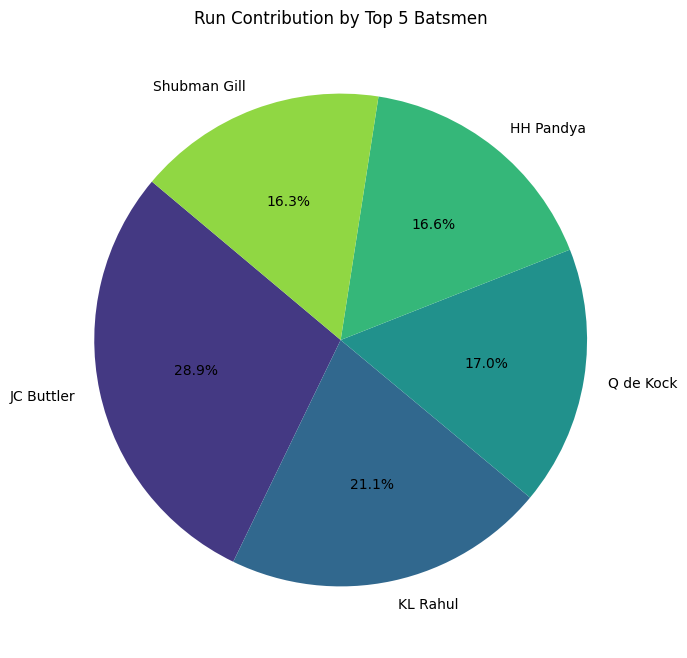

In [27]:
# 🔹 2️⃣ **Pie Chart - Run Contribution by Top 5 Batsmen**
top_5_scorers = top_scorers.head(5)

plt.figure(figsize=(10, 8))
plt.pie(top_5_scorers.values, labels=top_5_scorers.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 5))
plt.title("Run Contribution by Top 5 Batsmen")
plt.show()

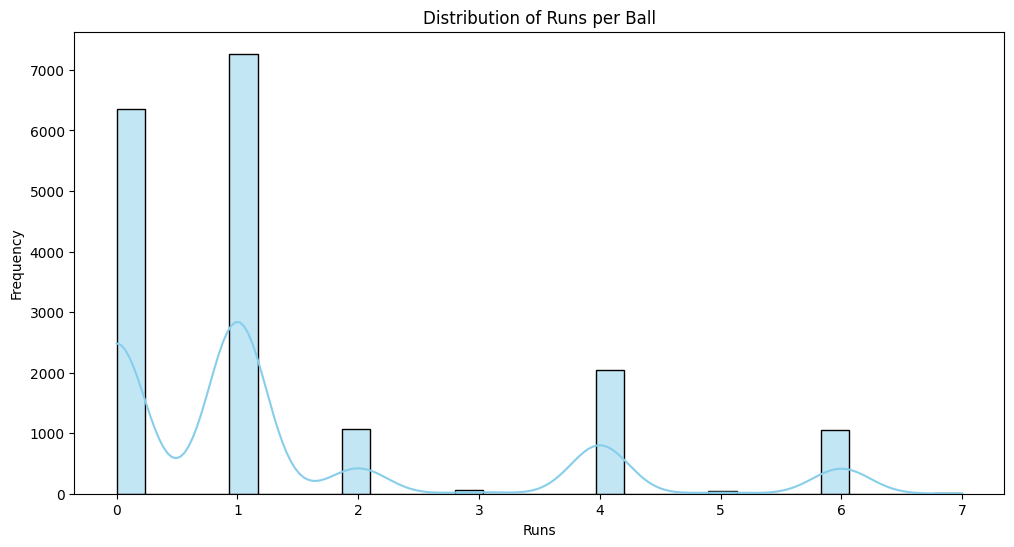

In [28]:
#  **Histogram - Distribution of Runs per Ball**
plt.figure(figsize=(12, 6))
sns.histplot(ipl['total_run'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Runs per Ball")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_23193/3427027977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overs', y='total_run', data=ipl, palette='Set2')


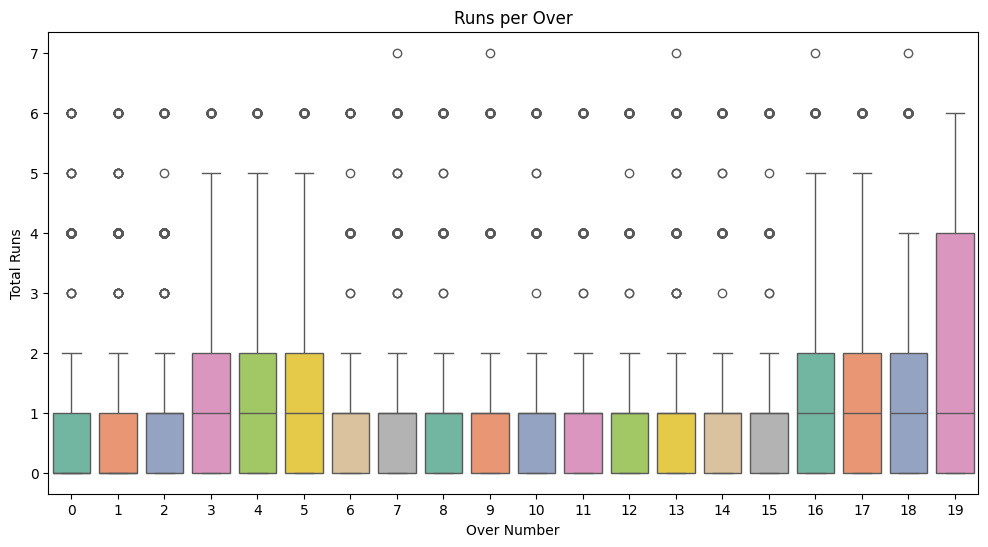

In [29]:
# 🔹 4️⃣ **Box Plot - Runs per Over**
plt.figure(figsize=(12, 6))
sns.boxplot(x='overs', y='total_run', data=ipl, palette='Set2')
plt.title("Runs per Over")
plt.xlabel("Over Number")
plt.ylabel("Total Runs")
plt.xticks(rotation=0)
plt.show()

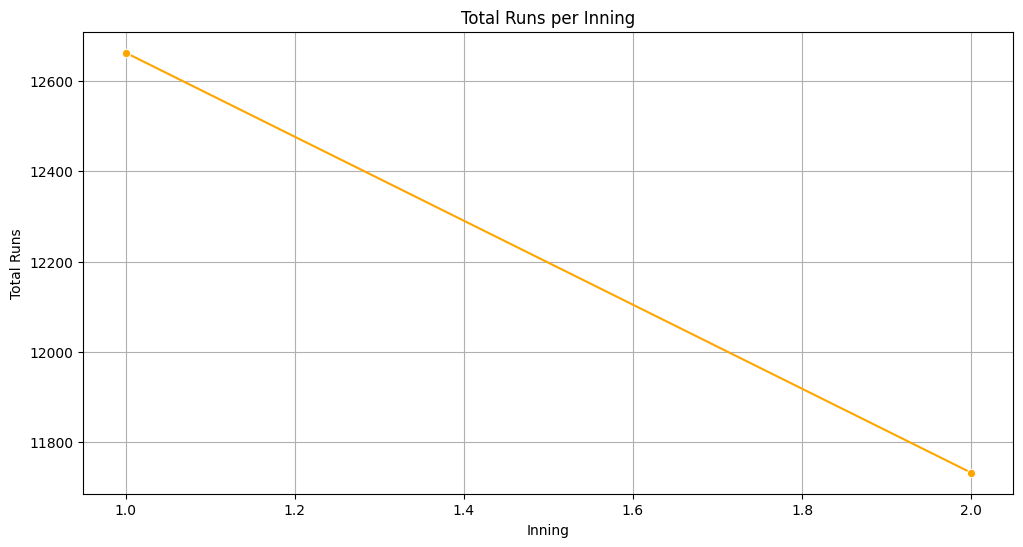

In [30]:
# 🔹 5️⃣ **Line Plot - Runs per Inning**
runs_per_inning = ipl.groupby('innings')['total_run'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=runs_per_inning.index, y=runs_per_inning.values, marker='o', color='orange')
plt.title("Total Runs per Inning")
plt.xlabel("Inning")
plt.ylabel("Total Runs")
plt.grid(True)
plt.show()

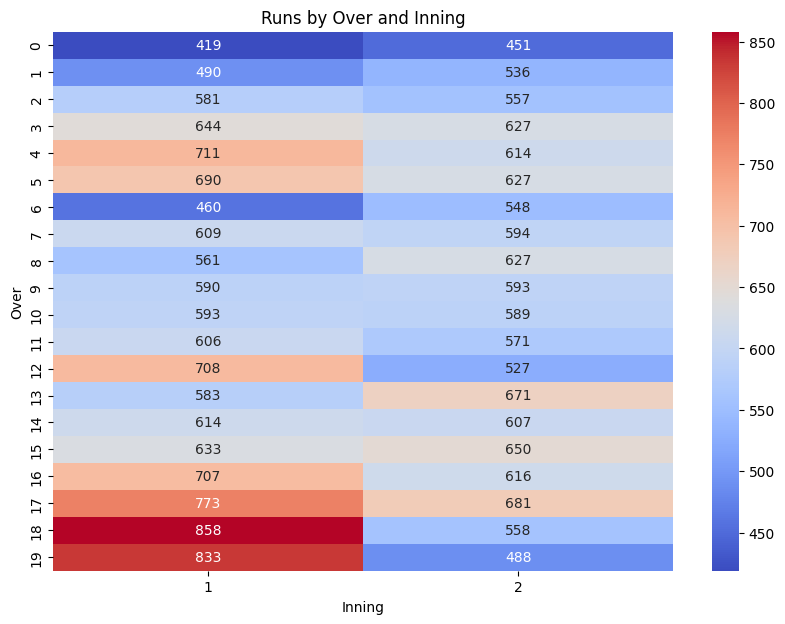

In [31]:
# 🔹 6️⃣ **Heatmap - Runs by Over and Inning**
pivot_table = ipl.pivot_table(values='total_run', index='overs', columns='innings', aggfunc='sum')

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f')
plt.title("Runs by Over and Inning")
plt.xlabel("Inning")
plt.ylabel("Over")
plt.show()

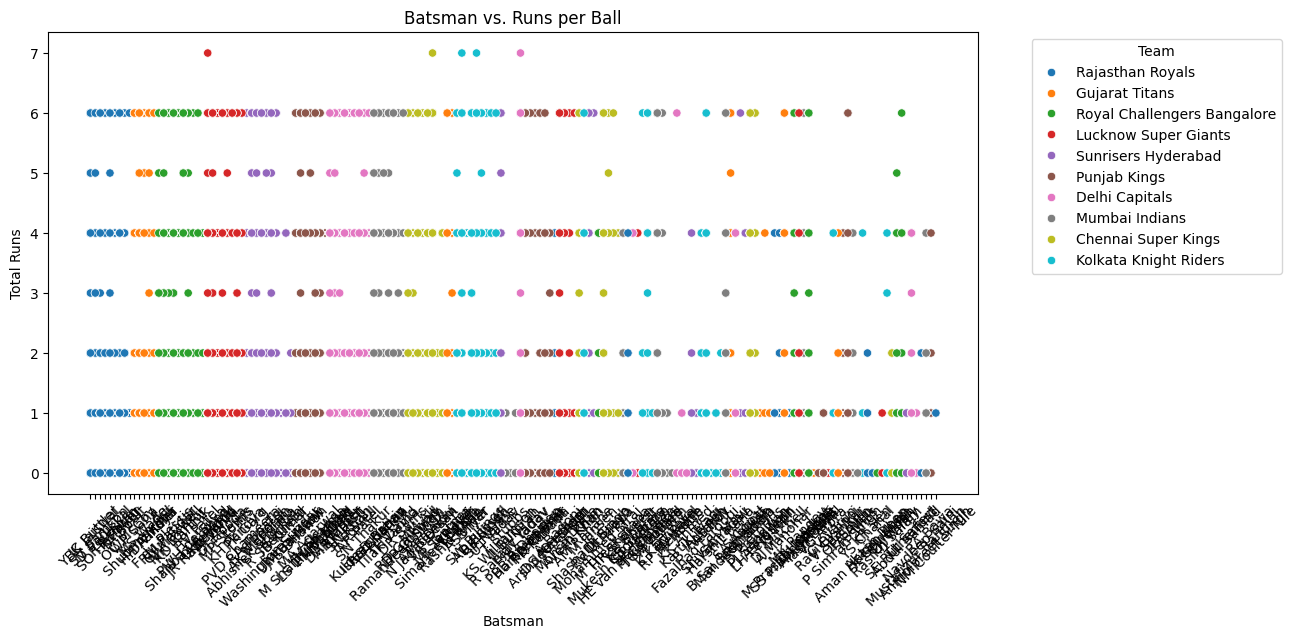

In [32]:
# 🔹 **Scatter Plot - Batsman vs. Runs per Ball**
plt.figure(figsize=(12, 6))
sns.scatterplot(x='batter', y='total_run', data=ipl, hue='BattingTeam', palette='tab10')
plt.title("Batsman vs. Runs per Ball")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipykernel_23193/1185231352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='batter', data=ipl, order=ipl['batter'].value_counts().index[:10], palette='magma')


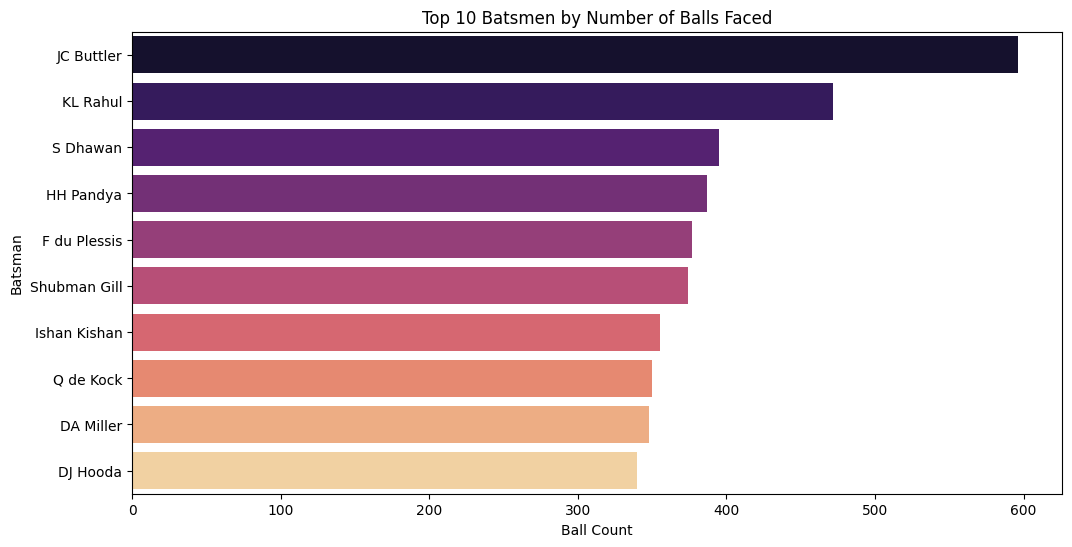

In [33]:
# 🔹 8️⃣ **Count Plot - How Many Times Each Batsman Played**
plt.figure(figsize=(12, 6))
sns.countplot(y='batter', data=ipl, order=ipl['batter'].value_counts().index[:10], palette='magma')
plt.title("Top 10 Batsmen by Number of Balls Faced")
plt.xlabel("Ball Count")
plt.ylabel("Batsman")
plt.show()

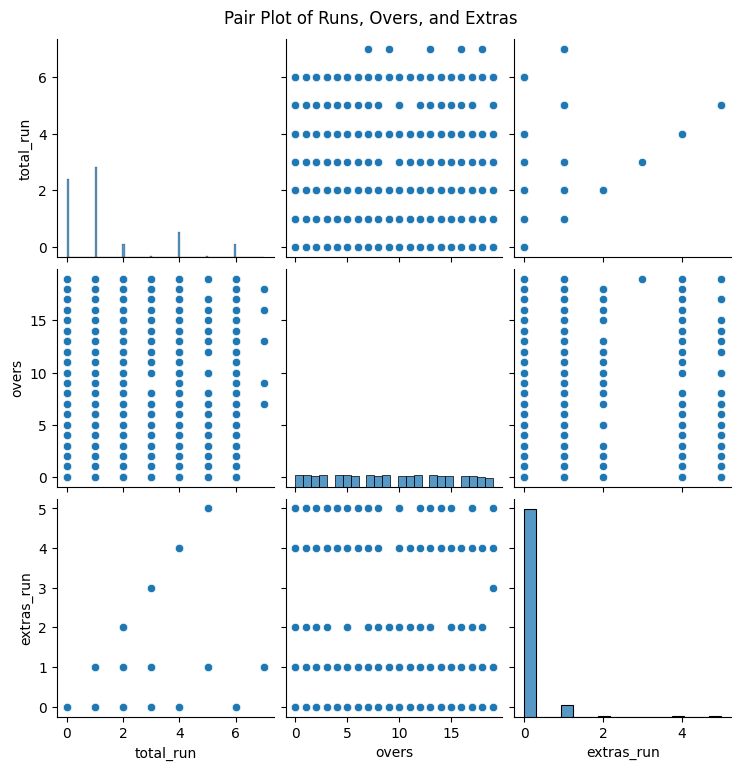

In [34]:
# 🔹 9️⃣ **Pair Plot - Relation Between Runs, Overs, and Extras**
sns.pairplot(ipl[['total_run', 'overs', 'extras_run']])
plt.suptitle("Pair Plot of Runs, Overs, and Extras", y=1.02)
plt.show()

/tmp/ipykernel_23193/728706352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='innings', y='total_run', data=ipl, palette='muted')


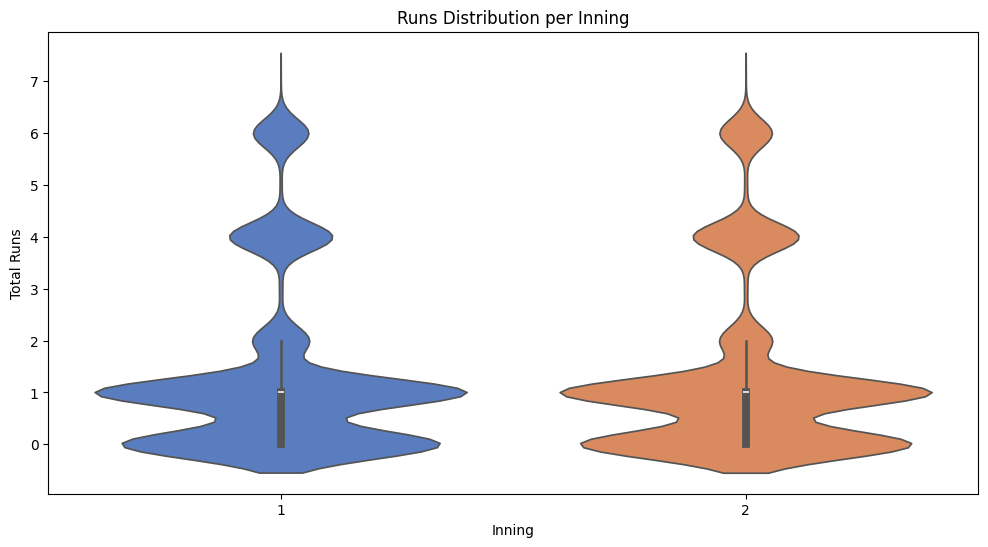

In [35]:
# 🔹 🔟 **Violin Plot - Runs Distribution per Inning**
plt.figure(figsize=(12, 6))
sns.violinplot(x='innings', y='total_run', data=ipl, palette='muted')
plt.title("Runs Distribution per Inning")
plt.xlabel("Inning")
plt.ylabel("Total Runs")
plt.show()